In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

startups = pd.read_csv(r"C:\Users\User\Desktop\ML\proj\Book1.csv")
df=startups.copy()
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [2]:
df.isna().sum()  # isna is null  -->> check every column is null

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [3]:
df.shape

(50, 5)

In [5]:
corr = df.corr(numeric_only=True)  # see correlation between colums
corr

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

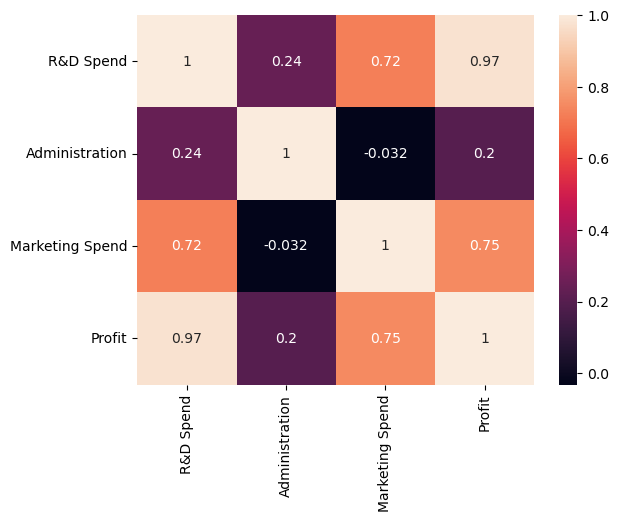

In [6]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='R&D Spend', ylabel='Profit'>

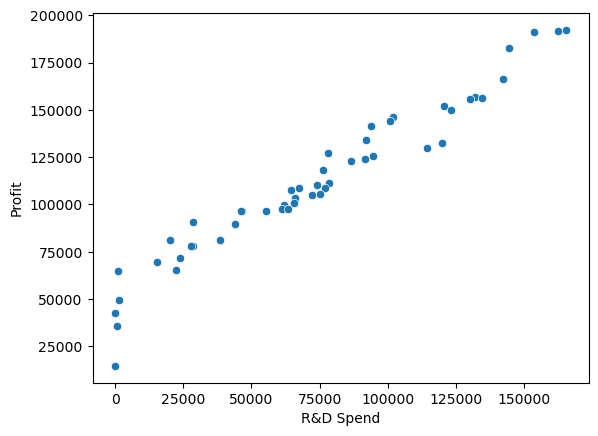

In [7]:
sns.scatterplot(x='R&D Spend',y="Profit",data= df)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [9]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [10]:
df_state=pd.get_dummies(df["State"]) # convert string column into one-hot encoded columns
df_state.head()

,California,Florida,New York
0,False,False,True
1,True,False,False
2,False,True,False
3,False,False,True
4,False,True,False


In [12]:

df=pd.concat([df,df_state],axis=1)
df=df.drop(['Florida','State'],axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,New York,California,New York
0,165349.20,136897.80,471784.10,192261.83,False,True,False,True
1,162597.70,151377.59,443898.53,191792.06,True,False,True,False
2,153441.51,101145.55,407934.54,191050.39,False,False,False,False
3,144372.41,118671.85,383199.62,182901.99,False,True,False,True
4,142107.34,91391.77,366168.42,166187.94,False,False,False,False


In [14]:
x=df.drop(['Profit'],axis=1)
y=df['Profit']
x.head()

,R&D Spend,Administration,Marketing Spend,California,New York,California,New York
0,165349.20,136897.80,471784.10,False,True,False,True
1,162597.70,151377.59,443898.53,True,False,True,False
2,153441.51,101145.55,407934.54,False,False,False,False
3,144372.41,118671.85,383199.62,False,True,False,True
4,142107.34,91391.77,366168.42,False,False,False,False


In [15]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test= train_test_split (x,y,test_size=0.3,random_state=35)


In [25]:
lr=LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)
y_predict

array([ 82650.9117116 , 114969.39758638, 118676.50929817,  96544.92731081,
       100747.9090714 ,  57717.3968126 ,  77491.15050383, 129634.19513011,
       102260.23338696, 113685.4346295 ,  88383.71117144, 177651.4908451 ,
       133416.99793516,  99051.42621287, 155021.60473205])

In [28]:
theta = lr.coef_
theta_0 = lr.intercept_
theta

array([ 8.32481595e-01, -2.06061407e-02,  2.58634933e-02, -2.01353686e+03,
       -2.62380055e+03, -2.01353686e+03, -2.62380055e+03])

In [29]:
theta_0

np.float64(51762.582889020385)

In [20]:
df= pd.DataFrame({'y_test':y_test,'y_pre':y_predict,"diff (y _ y^)":abs(y_predict - y_test)})
df.head()


,y_test,y_pre,diff (y _ y^)
39,81005.76,82650.911712,1645.151712
26,105733.54,114969.397586,9235.857586
22,110352.25,118676.509298,8324.259298
31,97483.56,96544.927311,938.632689
29,101004.64,100747.909071,256.730929


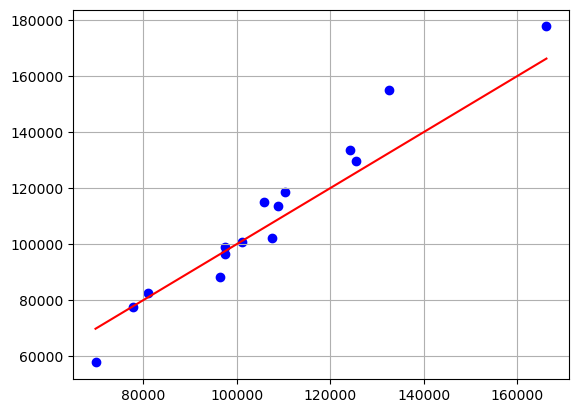

In [24]:
plt.scatter(y_test, y_predict, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.grid(True)